### Machine Learning
#### Recall

* Gonzalo Fuertes Sémelas
* Álvaro Pérez Trasancos
* Miguel Chacón Maldonado
* Ubaldo Peralta Sánchez
* Álvaro Nicholas García Crawford
* Miguel López Melgar

Load the predictions attached in the original handing, as well as the solutions:

In [1]:
import pandas as pd

# Load CSV with the predictions ("preds") and CSV with the solutions ("actual")
preds = pd.read_csv('predictions.csv')
actual = pd.read_csv('../soluciones.csv')

# List of products
targets = [col for col in preds.columns if 'ind_prod' in col]

Predictions and solutions are merged by ```cod_persona```.

In [2]:
ps = actual.merge(preds, how='inner', on='cod_persona', suffixes=('_actual', '_preds'))

The evaluation is going to be made through the recall. Here two functions are defined: one to show the confusion matrices in a friendly way and another to show the classification reports in a DataFrame.

In [3]:
def plot_confusion_matrix(y_true, y_pred, ax=None,
                          normalize=False, fig_title='Confusion matrix', color='Blues'):
    '''
    This function prints and plots the confusion matrix of y_true and y_pred.
    Normalization can be applied by setting 'normalize=True'.
    '''
    from sklearn.metrics import confusion_matrix
    from numpy import unique, append, newaxis, arange
    from itertools import product
    from matplotlib.pyplot import gca, get_cmap
    ax = ax or gca()
    classes_true = unique(y_true)
    classes_pred = unique(y_pred)
    classes = unique(append(classes_true, classes_pred))
    cmatrix = confusion_matrix(y_true, y_pred, labels=classes)
    cmap = get_cmap(color)
    if normalize:
        cmatrix = cmatrix.astype('float') / cmatrix.sum(axis=1)[:, newaxis]
        fig_title = 'Normalized ' + fig_title
    ax.imshow(cmatrix, interpolation='nearest', cmap=cmap)
    ax.set_title(fig_title)
    tick_marks = arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cmatrix.max() / 2.
    for i, j in product(range(cmatrix.shape[0]), range(cmatrix.shape[1])):
        ax.text(j, i, format(cmatrix[i, j], fmt),
                horizontalalignment='center',
                color='white' if (cmatrix[i, j] > thresh and len(classes) > 1) else 'black')
    ax.set_ylabel('True classes')
    ax.set_xlabel('Predicted classes')
    return ax

In [4]:
def report_to_dataframe(report):
    tuple_keys = [('0', 'precision'), ('0', 'recall'), ('0', 'f1-score'),
                  ('1', 'precision'), ('1', 'recall'), ('1', 'f1-score')]
    tuple_values = []
    for d in report:
        for keys in tuple_keys:
            try:
                tuple_values.append(d[keys[0]][keys[1]])
            except KeyError:
                tuple_values.append(float('nan'))

    tuple_dict = {key: [] for key in tuple_keys}
    for i in range(len(tuple_values)):
        tuple_dict[tuple_keys[mod(i, len(tuple_keys))]].append(round(tuple_values[i], 3))

    tuple_dict[('accuracy', '')] = []
    for d in report:
        tuple_dict[('accuracy', '')].append(round(d['accuracy'], 3))

    return pd.DataFrame(tuple_dict, index=targets)

Metric applied:

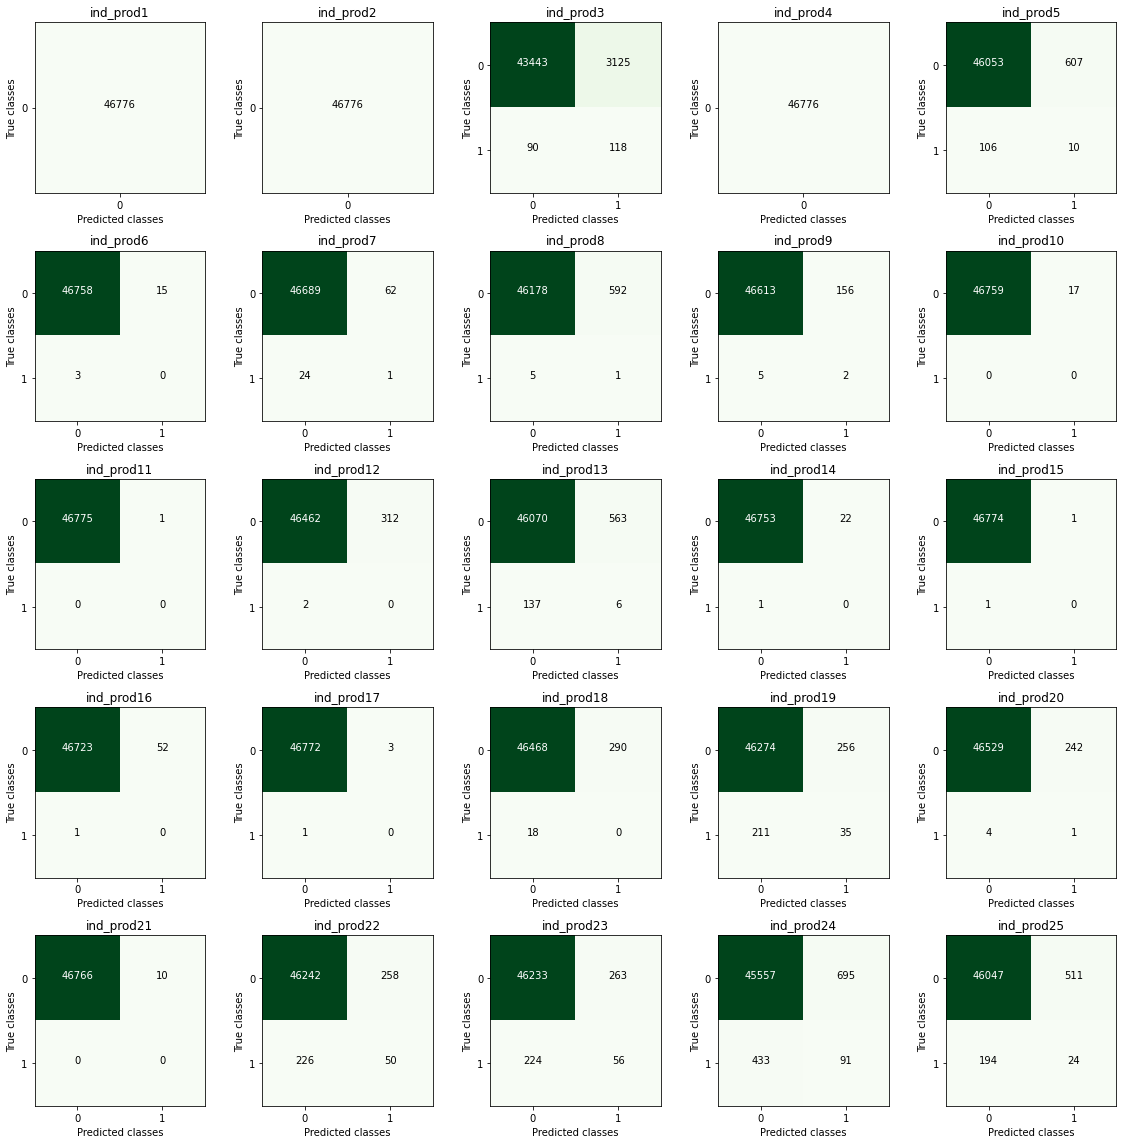

In [5]:
# Plot confusion matrices
from matplotlib.pyplot import subplots, tight_layout
from numpy import mod

fig, axs = subplots(5, 5, figsize=(16, 16))
r = 0
for i in range(len(targets)):
    plot_confusion_matrix(ps[targets[i] + '_actual'], ps[targets[i] + '_preds'],
                          ax=axs[r][mod(i, 5)], fig_title=targets[i], color='Greens')
    if mod(i, 5) == 4:
        r += 1
tight_layout()

In [6]:
# Classification reports
from sklearn.metrics import classification_report

report = []
for i in range(len(targets)):
    report.append(classification_report(ps[targets[i] + '_actual'], ps[targets[i] + '_preds'],
                                        output_dict=True, zero_division=0))

report_to_dataframe(report)

0                         1                 accuracy
           precision recall f1-score precision recall f1-score         
ind_prod1      1.000  1.000    1.000       NaN    NaN      NaN    1.000
ind_prod2      1.000  1.000    1.000       NaN    NaN      NaN    1.000
ind_prod3      0.998  0.933    0.964     0.036  0.567    0.068    0.931
ind_prod4      1.000  1.000    1.000       NaN    NaN      NaN    1.000
ind_prod5      0.998  0.987    0.992     0.016  0.086    0.027    0.985
ind_prod6      1.000  1.000    1.000     0.000  0.000    0.000    1.000
ind_prod7      0.999  0.999    0.999     0.016  0.040    0.023    0.998
ind_prod8      1.000  0.987    0.994     0.002  0.167    0.003    0.987
ind_prod9      1.000  0.997    0.998     0.013  0.286    0.024    0.997
ind_prod10     1.000  1.000    1.000     0.000  0.000    0.000    1.000
ind_prod11     1.000  1.000    1.000     0.000  0.000    0.000    1.000
ind_prod12     1.000  0.993    0.997     0.000  0.000    0.000    0.993
ind_prod13     0.997  0.988    0.992     0.011  0.042    0.017    0.985
ind_prod14     1.000  1.000    1.000     0.000  0.000    0.000    1.000
ind_prod15     1.000  1.000    1.000     0.000  0.000    0.000    1.000
ind_prod16     1.000  0.999    0.999     0.000  0.000    0.000    0.999
ind_prod17     1.000  1.000    1.000     0.000  0.000    0.000    1.000
ind_prod18     1.000  0.994    0.997     0.000  0.000    0.000    0.993
ind_prod19     0.995  0.994    0.995     0.120  0.142    0.130    0.990
ind_prod20     1.000  0.995    0.997     0.004  0.200    0.008    0.995
ind_prod21     1.000  1.000    1.000     0.000  0.000    0.000    1.000
ind_prod22     0.995  0.994    0.995     0.162  0.181    0.171    0.990
ind_prod23     0.995  0.994    0.995     0.176  0.200    0.187    0.990
ind_prod24     0.991  0.985    0.988     0.116  0.174    0.139    0.976
ind_prod25     0.996  0.989    0.992     0.045  0.110    0.064    0.985